In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv("Churn.csv")

In [39]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [40]:
df.shape

(7043, 21)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [43]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [44]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [45]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [46]:
df.shape

(7032, 21)

In [47]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
df=df.drop('customerID',axis=1)

In [49]:
data_columns = ['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

for column in data_columns:
    unique_values = df[column].unique()
    print(f"{column} column: {unique_values}", end = '\n')

gender column: ['Female' 'Male']
Partner column: ['Yes' 'No']
Dependents column: ['No' 'Yes']
PhoneService column: ['No' 'Yes']
MultipleLines column: ['No phone service' 'No' 'Yes']
InternetService column: ['DSL' 'Fiber optic' 'No']
OnlineSecurity column: ['No' 'Yes' 'No internet service']
OnlineBackup column: ['Yes' 'No' 'No internet service']
DeviceProtection column: ['No' 'Yes' 'No internet service']
TechSupport column: ['No' 'Yes' 'No internet service']
StreamingTV column: ['No' 'Yes' 'No internet service']
StreamingMovies column: ['No' 'Yes' 'No internet service']
Contract column: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling column: ['Yes' 'No']
PaymentMethod column: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn column: ['No' 'Yes']


In [50]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

## Data Visualization

In [51]:
df.describe(include='O').T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


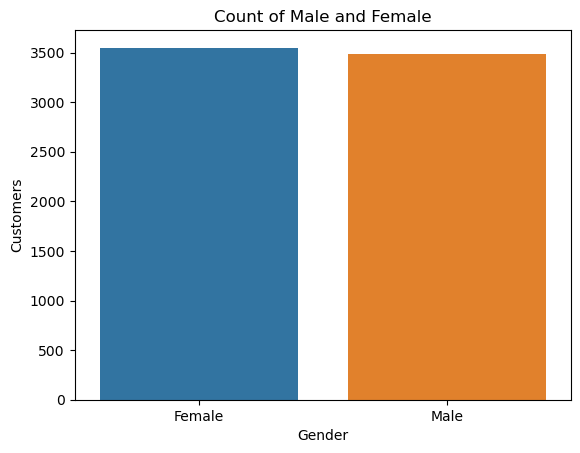

In [52]:
sns.barplot(y =df['gender'].value_counts().values,x=df.gender.unique())
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.title('Count of Male and Female')
plt.show()

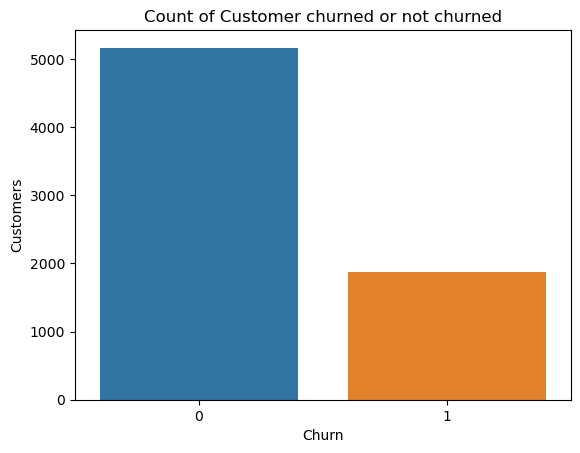

In [53]:
sns.barplot(y =df['Churn'].value_counts().values,x=df.Churn.unique())
plt.xlabel('Churn')
plt.ylabel('Customers')
plt.title('Count of Customer churned or not churned')
plt.show()

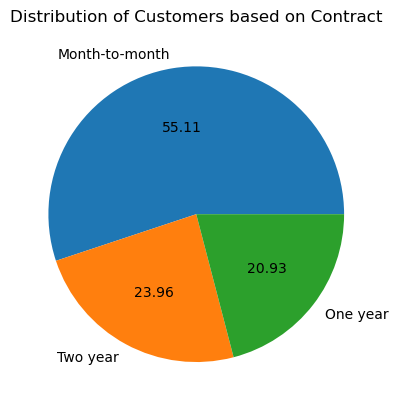

In [54]:
plt.pie(x=df['Contract'].value_counts().values,labels=df['Contract'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Customers based on Contract')
plt.show()

More than half of the customers are on Month-to-Month Contract.

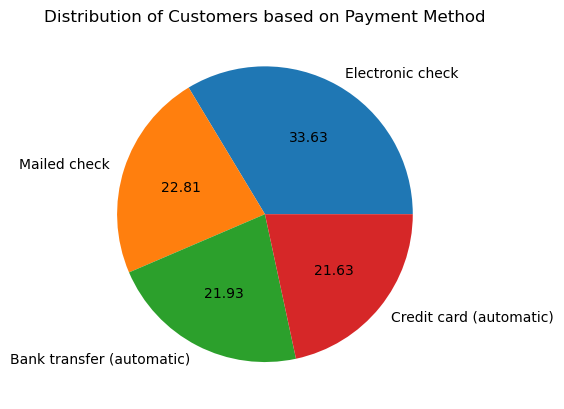

In [55]:
plt.pie(x=df['PaymentMethod'].value_counts().values,labels=df['PaymentMethod'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Customers based on Payment Method')
plt.show()

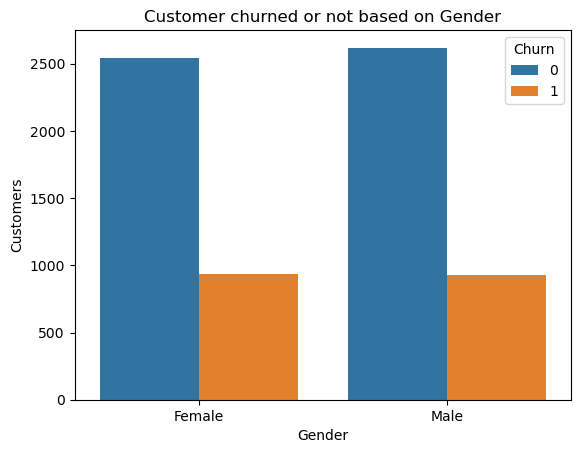

In [56]:
sns.countplot(data=df,x='gender',hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.title('Customer churned or not based on Gender')
plt.show()

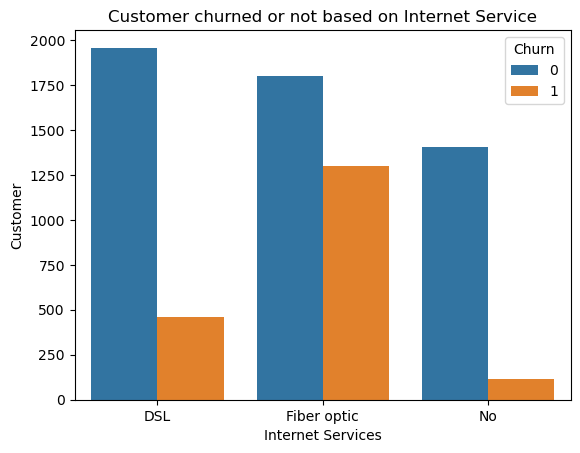

In [57]:
# Churn by Internet Service
sns.countplot(data=df,x='InternetService',hue='Churn')
plt.xlabel('Internet Services')
plt.ylabel('Customer')
plt.title('Customer churned or not based on Internet Service')
plt.show()

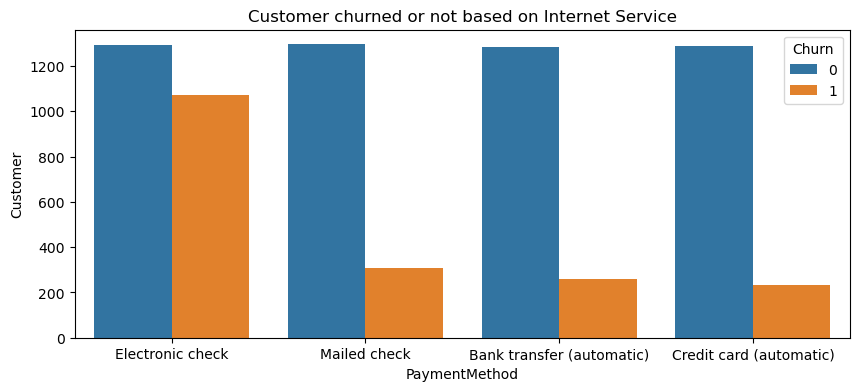

In [58]:
# Churn by Payment Method
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Customer')
plt.title('Customer churned or not based on Internet Service')
plt.show()

Churn in Female Customers is almost equal to churn in male customers. So we can assume churn is independent of Gender.

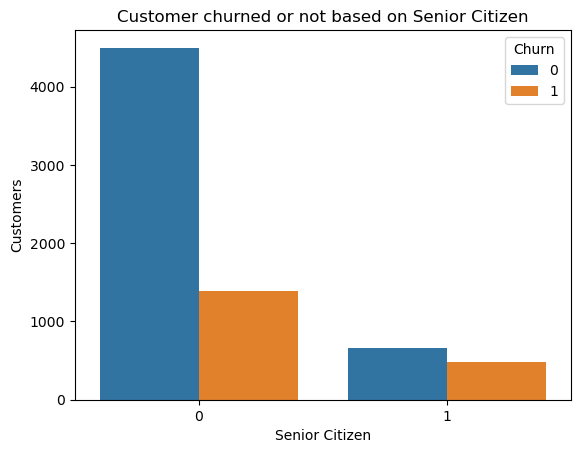

In [59]:
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer churned or not based on Senior Citizen')
plt.show()

The ratio of churn in senior citizen(1) is high as compared to non senior citizen. Has Senior citizens are more likely to churn.

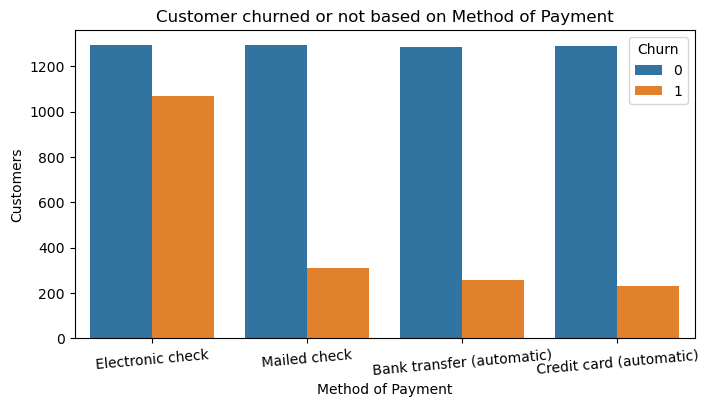

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.xlabel('Method of Payment')
plt.xticks(rotation=5)
plt.ylabel('Customers')
plt.title('Customer churned or not based on Method of Payment')
plt.show()

Customers who pay through Electronic check are most likely to churn.

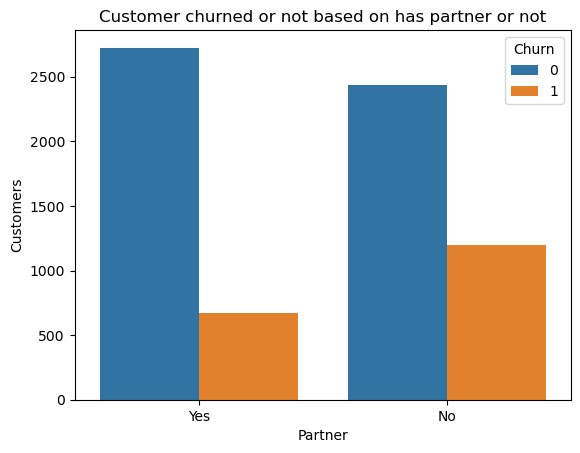

In [61]:
sns.countplot(data=df,x='Partner',hue='Churn')
plt.xlabel('Partner')
plt.ylabel('Customers')
plt.title('Customer churned or not based on has partner or not')
plt.show()

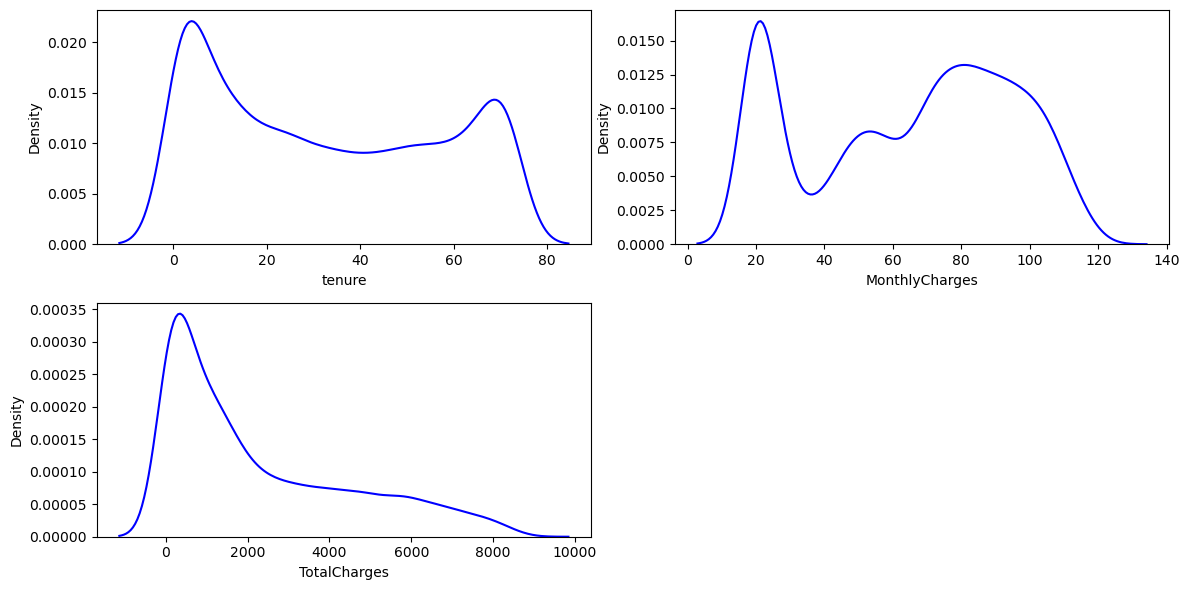

In [62]:
plt.figure(figsize=(12,6))

features = ['tenure','MonthlyCharges','TotalCharges']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

* What you need to pay attention to in the 3 columns is tenure, monthly charges, and total charges. 
* Senior Citizen is ignored because it is more categorical
* The data distribution is more positively skewed
* The distribution of data on Tenure is mostly at values 5 and 70
* The distribution of data on Monthly Charges is mostly at values 23 and 77
* The highest distribution of data on Total Charges is at the value 500

## Feature Engineering

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
      if dataframe_series.dtype == 'object':
        encoder = LabelEncoder()
        return encoder.fit_transform(dataframe_series)
      else:
        # Return the series unchanged if it's not of type 'object'
        return dataframe_series

# Apply the function to encode categorical columns in the DataFrame
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
df[categorical_cols] = df[categorical_cols].apply(object_to_int)


In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


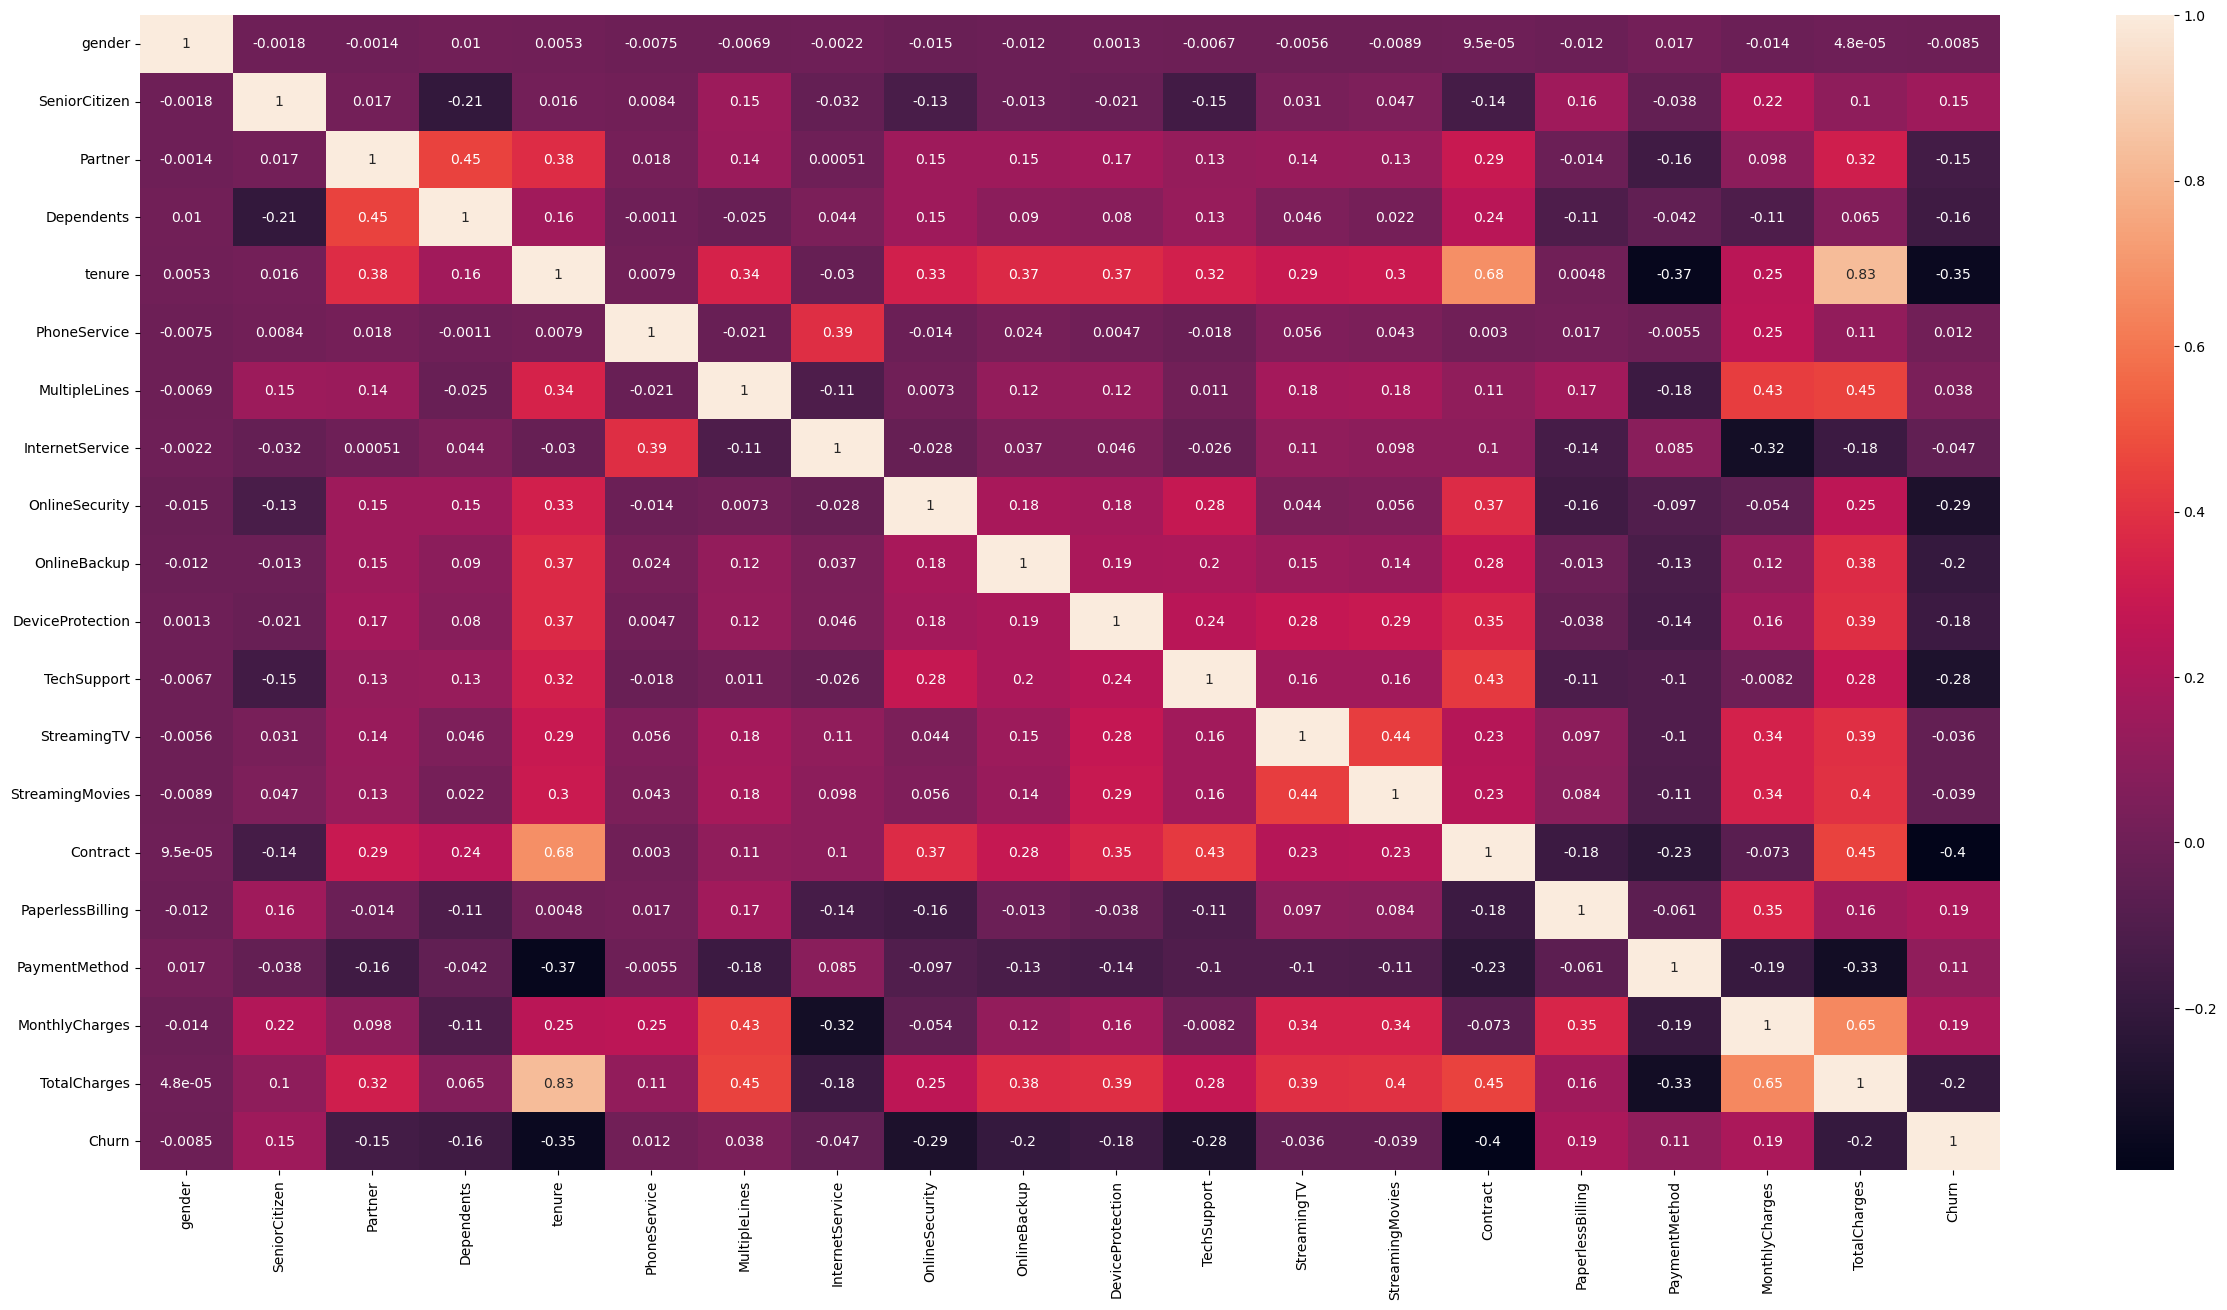

In [65]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
X = df.drop(columns = ['Churn','MultipleLines','PhoneService','gender','StreamingTV','StreamingMovies','InternetService'])
y = df['Churn'].values

In [68]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [70]:
RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1528
           1       0.62      0.48      0.54       582

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.76      0.78      0.77      2110



In [71]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1528
           1       0.57      0.43      0.49       582

    accuracy                           0.75      2110
   macro avg       0.69      0.65      0.67      2110
weighted avg       0.74      0.75      0.74      2110



C:\Users\TANU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
gbc = GradientBoostingClassifier(max_depth=1)
gbc.fit(X_train, y_train)
gbcy_pred=gbc.predict(X_test)
accuracy_score(gbcy_pred, y_test)
# predicting the test set results
y_pred = gbc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1528
           1       0.67      0.49      0.57       582

    accuracy                           0.79      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110

